In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To load dataset
df=pd.read_csv('/content/sample_data/creditcard.csv')

In [3]:
#To show first five records
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#To show no. of columns and no.of rows
df.shape

(284807, 31)

In [5]:
#we have classification dataset means apply classification algorithm means 
#to predict Either creditcard fraud is there or not 

In [6]:
#check null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
#check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

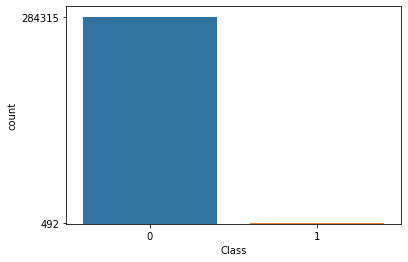

In [8]:
#we predict class (target)
#how many '0' and '1' in target column class
#visualize form then use inbuilt method countplot() because data is categorical
sns.countplot(data=df,x='Class')
c=df["Class"].value_counts()
plt.yticks(c)
plt.show()

In [9]:
#Here data is imbalance means more difference between 0 and 1 data of
#target
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [10]:
#Here 0 : Majority class   and 1 : Minority class  means data is imbalance
#so we have to balance the output variable
# to Balance the target variable then used sampling technique : -
#There are 2 types of sampling technique : -
# 1. Random Under Sampling
# 2. Random over sampling

In [11]:
#Here we use Random over sampling
#Random Over Sampling : - we increase the minority class means creates the duplicate rows of 1 class 
#(minority)class and equal to majority class means 0 class 
#If we are increasing the minority class that is known as over sampling .
#call class inbuilt class RandomOverSampling : - define in imblearn package 


In [12]:
from imblearn.over_sampling import RandomOverSampler
 #If you have basically creating duplicate rows of the minority class that is known as Over
 # sampling 

In [13]:
#if converts minority class to majority class  then use RandomOverSampler 
#Here in this dataset : Majority class :0  and Minority class : 1
#create object of  RandomOverSampler() class
ros = RandomOverSampler()

In [14]:
#separate input and output variable from df dataframe: 
X=df.drop("Class",axis=1) #input variable
Y=df["Class"] #Target variable

In [15]:
# call train_test_split to split dataset into 70% training and 30% testing data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [16]:
#train : use fit()
#test : predict()
#classification problem : report generate : use classification_report()
#user defined function create
def create_model(model):
    model.fit(X_train,Y_train)#we train the model
    y_pred=model.predict(X_test) #test
    print(classification_report(Y_test,y_pred))
    print("Confusion Matrix : ")
    print(confusion_matrix(Y_test,y_pred))
    return model

In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [18]:
#Base Line Model means use Logistic Regression(we predict 0/1 values then 
#use classification algorithm)

from sklearn.linear_model import LogisticRegression

In [19]:
#create the object of LogisticRegression class
lr=LogisticRegression()

In [20]:
#call function
create_model(lr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.70      0.63      0.66       135

    accuracy                           1.00     85443
   macro avg       0.85      0.81      0.83     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix : 
[[85271    37]
 [   50    85]]


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
#fit_sample() inbuilt function which define RandomoverSampler class and pass training data
#we have X_train and Y_train (70%)
X_sample_train,Y_sample_train = ros.fit_sample(X_train,Y_train)

In [22]:
#check
pd.Series(Y_sample_train).value_counts()

1    199007
0    199007
dtype: int64

In [23]:
#Testing data 30% 
pd.Series(Y_test).value_counts() #this is unbalance 

0    85308
1      135
Name: Class, dtype: int64

In [24]:
#fit_sample() inbuilt function which define RandomOverSampler class and pass testing data
#we have X_test and Y_test (30%)
X_sample_test,Y_sample_test = ros.fit_sample(X_test,Y_test) 

In [25]:
#check
pd.Series(Y_sample_test).value_counts()

1    85308
0    85308
dtype: int64

In [26]:
#we train the model with the help og Logistic regression after apply randomoversampler
#we create the object of Logistic Regression class
lr=LogisticRegression()

In [27]:
#create function
def create_model1(model):
    model.fit(X_sample_train,Y_sample_train)#we train the model
    Y_pred=model.predict(X_sample_test) #test
    print(classification_report(Y_sample_test,Y_pred))
    print("Confusion Matrix : ")
    print(confusion_matrix(Y_sample_test,Y_pred))
    return model

In [28]:
#call function
create_model1(lr)

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     85308
           1       0.96      0.84      0.90     85308

    accuracy                           0.90    170616
   macro avg       0.91      0.90      0.90    170616
weighted avg       0.91      0.90      0.90    170616

Confusion Matrix : 
[[81993  3315]
 [13261 72047]]


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
#Apply decisionTreeClassifier : this is select algorithm of classification ,Its help to select imp
#features to predict the o/p , not done manually data analysis to select imp features
from sklearn.tree import DecisionTreeClassifier

In [30]:
#create the object of DecisionTreeClassifier class
dt1=DecisionTreeClassifier() #by default gini index method to select imp features

In [31]:
#call function
dt1=create_model1(dt1)

              precision    recall  f1-score   support

           0       0.77      1.00      0.87     85308
           1       1.00      0.70      0.82     85308

    accuracy                           0.85    170616
   macro avg       0.88      0.85      0.84    170616
weighted avg       0.88      0.85      0.84    170616

Confusion Matrix : 
[[85278    30]
 [25850 59458]]


In [32]:
#here recall for 1 : 0.70 it is good but not better means model is overfit
dt1.feature_importances_ # to show reduction of all input features

array([1.39712739e-02, 1.40442759e-04, 1.97165245e-03, 1.02840824e-03,
       4.41210860e-02, 7.32370786e-03, 2.01732309e-03, 1.24976842e-02,
       1.08173537e-02, 5.42459542e-03, 3.77866332e-02, 1.93952845e-03,
       2.54008714e-02, 1.57995735e-02, 7.40880458e-01, 3.01512889e-05,
       1.31452169e-03, 6.45507427e-03, 2.60034653e-03, 1.15382242e-02,
       1.77854643e-02, 1.75810381e-03, 5.61812193e-03, 5.99922786e-03,
       1.10216166e-04, 4.69126207e-04, 5.64175933e-03, 4.87632587e-03,
       4.25799231e-03, 1.04247520e-02])

In [33]:
X.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [34]:
#recall =0.70 means model is overfit , to reduced / remove overfit problem so apply pruning technique
#in decisiontreeclassifier class
#1. max_depth parameter : it cannot >8 
#create the object of DecisionTreeClassifier class
dt2=DecisionTreeClassifier(max_depth=4) #by default gini index

In [35]:
#call function
dt2=create_model1(dt2)

              precision    recall  f1-score   support

           0       0.86      0.98      0.92     85308
           1       0.98      0.84      0.91     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.91    170616
weighted avg       0.92      0.91      0.91    170616

Confusion Matrix : 
[[83843  1465]
 [13296 72012]]


In [36]:
F=dt2.feature_importances_ # to show reduction of all input features
print(np.round(F,2))

[0.   0.   0.   0.   0.05 0.   0.   0.   0.   0.   0.03 0.   0.03 0.
 0.86 0.   0.   0.   0.   0.   0.02 0.   0.   0.01 0.   0.   0.   0.
 0.   0.01]


In [37]:
#Apply Ensembling technique
#1.Apply Ada Boost ensembling technique:
from sklearn.ensemble import AdaBoostClassifier

In [38]:
#create the object of AdaBoostClassifier 
ada=AdaBoostClassifier(n_estimators=50) #n_estimators=100 : this is parameter (it is used for iteration)
#we define 100 , can be <=100 ,adaboost creates a decisionstump(decisiontree)

In [39]:
#call function after apply randomoversampler
create_model1(ada)

              precision    recall  f1-score   support

           0       0.89      0.99      0.93     85308
           1       0.98      0.87      0.93     85308

    accuracy                           0.93    170616
   macro avg       0.94      0.93      0.93    170616
weighted avg       0.94      0.93      0.93    170616

Confusion Matrix : 
[[84125  1183]
 [10817 74491]]


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [40]:
#2.Apply Gradient Boosting 
from sklearn.ensemble import GradientBoostingClassifier 

In [41]:
#create the object of GradientBoostingClassifier class
gbc=GradientBoostingClassifier(n_estimators=75) #no. of iterations <=100 use algo. decisiontreeclassifier

In [42]:
#call function after apply randomoversampler
create_model1(gbc)

              precision    recall  f1-score   support

           0       0.87      0.99      0.93     85308
           1       0.99      0.85      0.92     85308

    accuracy                           0.92    170616
   macro avg       0.93      0.92      0.92    170616
weighted avg       0.93      0.92      0.92    170616

Confusion Matrix : 
[[84719   589]
 [12667 72641]]


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=75,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [43]:
#3.Apply Extreme Gradient Boost(XGB): It is better version of Gradient boosting
from xgboost import XGBClassifier  #call xgboost inbuilt package

In [44]:
#create the object of XGBClassifier class
xgb=XGBClassifier(n_estimators=100,reg_alpha=1) #reg_alpha=1 means automatic handle overfitting situation and
#outlier 

In [45]:
#call function after apply randomoversampler
create_model1(xgb)

              precision    recall  f1-score   support

           0       0.86      1.00      0.93     85308
           1       0.99      0.84      0.91     85308

    accuracy                           0.92    170616
   macro avg       0.93      0.92      0.92    170616
weighted avg       0.93      0.92      0.92    170616

Confusion Matrix : 
[[84888   420]
 [13297 72011]]


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=1, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [46]:
#Apply another ensembling tech :  randomforesttree :it use decisiontree
from sklearn.ensemble import RandomForestClassifier  #use decisiontree

In [47]:
#create the object of RandomForestClassifier class
rfc=RandomForestClassifier(n_estimators=100,max_features=4,random_state=1)#here n_estimators is a parameter
#which show no. of decisiontree (how many decisiontree) and max_features means max imp input select
X.shape

(284807, 30)

In [48]:
#call function after apply randomoversampler
create_model1(rfc)

              precision    recall  f1-score   support

           0       0.81      1.00      0.89     85308
           1       1.00      0.76      0.87     85308

    accuracy                           0.88    170616
   macro avg       0.90      0.88      0.88    170616
weighted avg       0.90      0.88      0.88    170616

Confusion Matrix : 
[[85300     8]
 [20156 65152]]


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [55]:
Y_pred=rfc.predict(X_sample_test)

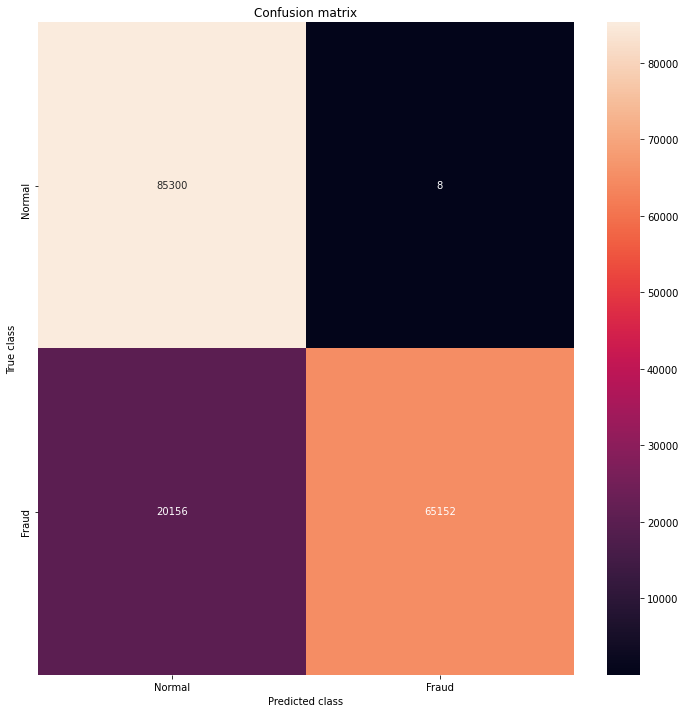

In [56]:
#Visulalizing the Confusion Matrix
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_sample_test,Y_pred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()